<h3>L'indicateur de connectivité à Internet</h3>
<p>L'objectif est de filtrer un maximum de Pays potentiel à partir de l'indicateur '<b>IT.NET.USER.P2</b>'.</p>
<p>Cet indicateur, qui indique pour 100 personnes, combien on accès à internet,<br /> est <b>essentiel</b> car <u>un pays peu connecté à internet a peu de potentiel dans ce projet</u>.</p>

<p><u>Avant de commencer</u> :</p>
<p>
    <ol>
        <li>Importation des librairies nécessaires</li>        
        <li>Modification des paramètres par défaut de <i>Jupyter</i></li>
        <li>Importation du <i>DataFrame</i> '<b>dataPastBackup</b>' préparé précédemment via <i>Pickle</i></li>
    </ol>
</p>

<p>Importation des librairies nécessaires :</p>

In [1]:
# Import des librairies Numpy et Pandas
import numpy as np
import pandas as pd
# Import des librairies Matplotlib et Seaborn
# pour la génération des graphiques
import matplotlib.pyplot as plt
import seaborn as sns
# Import de Pickle pour la restauration des objets Python.
import pickle

<p>Modification des paramètres par défault de <i>Jupyter</i> :</p>

In [2]:
# Modification des paramètres de Pandas pour 
# pouvoir afficher plus de lignes et plus de colonnes.
pd.set_option("display.max_rows", 210)
pd.set_option("display.max_columns",100)

<p>Import du DF '<b>dataPastBackup</b>', préparé précédemment, via <i>Pickle</i> dans le DF '<b>data</b>'.</p>

In [3]:
data = pickle.load(open('dataPastBackup', 'rb'))
data.tail()

,Country Name,Region,Indicator Code,Topic,Année Dernière Valeur Non Null,Dernière Valeur Non Null
886613,Zimbabwe,Sub-Saharan Africa,SL.UEM.TOTL.ZS,Social Protection & Labor: Unemployment,2016.0,5.20000
886922,Zimbabwe,Sub-Saharan Africa,UIS.LPP.AG15T24,Literacy,2014.0,35.88710
886923,Zimbabwe,Sub-Saharan Africa,UIS.LP.AG15T24,NaN,2014.0,311114.00000
886926,Zimbabwe,Sub-Saharan Africa,SE.ADT.1524.LT.ZS,Literacy,2014.0,90.42812
886928,Zimbabwe,Sub-Saharan Africa,SE.ADT.1524.LT.FM.ZS,Literacy,2014.0,1.06389


<h4>Data Cleaning du DF 'data':</h4>
<p>
    <ol>
        <li>Suppression des '<i>Indicator Code</i>' à l'exception de '<b>IT.NET.USER.P2</b>'</li>
        <li>Suppression des colonnes inutiles</li>
        <li>Suppression des pays sans valeur renseignée</li>
    </ol>
</p>

<p>Suppression des '<i>Indicator Code</i>' à l'exception de '<b>IT.NET.USER.P2</b>' :</p>

In [4]:
data = data[data['Indicator Code'] == 'IT.NET.USER.P2']
data.tail()

,Country Name,Region,Indicator Code,Topic,Année Dernière Valeur Non Null,Dernière Valeur Non Null
869980,Virgin Islands (U.S.),Latin America & Caribbean,IT.NET.USER.P2,Infrastructure: Communications,2016.0,59.608316
873645,West Bank and Gaza,Middle East & North Africa,IT.NET.USER.P2,Infrastructure: Communications,2016.0,61.178385
877310,"Yemen, Rep.",Middle East & North Africa,IT.NET.USER.P2,Infrastructure: Communications,2016.0,24.579208
880975,Zambia,Sub-Saharan Africa,IT.NET.USER.P2,Infrastructure: Communications,2016.0,25.506579
884640,Zimbabwe,Sub-Saharan Africa,IT.NET.USER.P2,Infrastructure: Communications,2016.0,23.119989


<p>Suppression des colonnes inutiles :</p>
<p><u>Je ne conserve que les colonnes suivantes,<br \>
    qui nous seront utiles dans la suite de l'analyse</u> :
    <ul>
        <li>Country Name</li>
        <li>Region</li>
        <li>Dernière Valeur Non Null</li>
    </ul>
</p>

In [5]:
data = data[['Country Name','Region','Dernière Valeur Non Null']]

<p>Suppression des pays sans valeur renseignée :</p>
<p>Je <u>supprime</u> maintenant <u>les pays qui n'ont pas de 'Dernière Valeur Non Null' connu</u> <br \>(valeur vaut 'nan') et <u>ceux qui ont une valeur renseignée à 0</u> (que je suspect d'être une erreur).</p>

In [6]:
data = data[(data['Dernière Valeur Non Null'].notnull()) & \
            (data['Dernière Valeur Non Null'] != 0)]

<p>Aperçu du DataFrame '<b>data</b>' <u>classé par ordre décroissant</u> sur le critère '<b>Dernière Valeur Non Null</b>' :</p>

In [7]:
data.sort_values(by='Dernière Valeur Non Null', ascending=False)

,Country Name,Region,Dernière Valeur Non Null
411855,Iceland,Europe & Central Asia,98.240016
507145,Liechtenstein,Europe & Central Asia,98.093904
169965,Bermuda,North America,98.000000
144310,Bahrain,Middle East & North Africa,97.999981
107660,Andorra,Europe & Central Asia,97.930637
514475,Luxembourg,Europe & Central Asia,97.493930
628090,Norway,Europe & Central Asia,97.298204
287245,Denmark,Europe & Central Asia,96.967785
569450,Monaco,Europe & Central Asia,95.208178
327560,Faroe Islands,Europe & Central Asia,95.108682


In [8]:
print('Il reste {} pays à analyser, répartis sur {} régions du monde.'.\
      format(len(data['Country Name'].unique()),len(data['Region'].unique())))

Il reste 203 pays à analyser, répartis sur 7 région du monde.


<p><u>Visualisation de diverses <b>informations statistiques</b></u>, pour le DataFrame '<b>data</b>', <br \>relatives à la connectivité des pays du monde, <u>classées par '<b>Region</b>'</u>.<br \>
    Les '<b>Region</b>' sont classés par <u>ordre décroissant</u> selon leur connectivité à Internet.</p>

In [9]:
data.groupby('Region').describe().sort_values(by=('Dernière Valeur Non Null','mean'), ascending=False)

Dernière Valeur Non Null                        \
                                              count       mean        std   
Region                                                                      
North America                                   3.0  88.005579  11.026673   
Europe & Central Asia                          54.0  74.319663  18.374951   
Middle East & North Africa                     21.0  57.957443  25.716167   
Latin America & Caribbean                      37.0  55.996939  18.057180   
East Asia & Pacific                            33.0  49.787789  27.360591   
South Asia                                      8.0  28.313673  16.024294   
Sub-Saharan Africa                             47.0  20.312099  14.590605   

                                                                        \
                                  min        25%        50%        75%   
Region                                                                   
North America               76.176737  83.008368  89.840000  93.920000   
Europe & Central Asia       17.990324  67.417849  76.154723  87.587070   
Middle East & North Africa  13.134915  39.213813  61.178385  77.289395   
Latin America & Caribbean   12.232602  45.000000  58.136494  67.030000   
East Asia & Pacific          9.601538  25.366301  46.500000  77.010000   
South Asia                  10.595726  17.563843  24.617963  34.481413   
Sub-Saharan Africa           1.177119   8.868023  18.000000  26.943613   

                                       
                                  max  
Region                                 
North America               98.000000  
Europe & Central Asia       98.240016  
Middle East & North Africa  97.999981  
Latin America & Caribbean   93.542454  
East Asia & Pacific         92.716545  
South Asia                  59.092590  
Sub-Saharan Africa          56.514708

<h4>Data Visualisation</h4>
<p>Mise en forme des informations récoltées :</p>
<p>
    <ol>
        <li>Tableau de la moyenne de la connectivité à Internet par région du monde</li>
        <li>Graphique en boite à moustache de la connectivité à Internet par région du monde</li>
    </ol>
</p>

<p><u>Graphique en boite à moustache</u> de la <b>connectivité à internet</b> par région du monde.<br \>
'<b>Region</b>' trié par médiane en ordre croissant.</p>

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text yticklabel objects>)

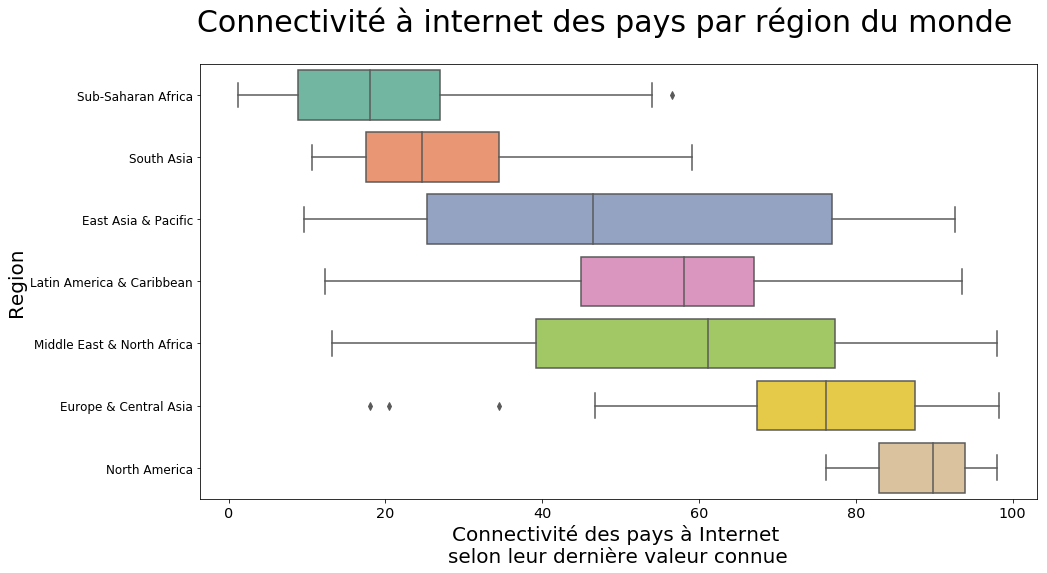

In [10]:
fig = plt.figure(figsize=(15,8))
fig.suptitle('Connectivité à internet des pays par région du monde', fontsize=30)

chart = sns.boxplot(
    data=data,
    x='Dernière Valeur Non Null',
    y='Region',
    palette='Set2',
    order=data.groupby('Region').median().sort_values(by='Dernière Valeur Non Null', ascending=True).index
)

chart.set_xlabel('Connectivité des pays à Internet \nselon leur dernière valeur connue',fontsize = 20) #xlabel
chart.set_ylabel('Region', fontsize = 20)#ylabel

plt.xticks(
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'  
)

plt.yticks(
    fontweight='light',
    fontsize='large'
)


<p>Les régions <b>"South Asia"</b> et <b>"sub-Saharan Africa"</b> sont <u>les moins connectées à Internet</u>.<br \> 
Même les valeurs les plus hautes de ces régions restent relativement modestes.</p>

<p>2 régions du monde se distinguent particulièrement par leur haute connectivité à internet :
    <ol>
        <li>North America</li>
        <li>Europe & Central Asia</li>
    </ol>
</p>

<p>Liste de tous les pays classés en ordre croissant selon leur connectivité à Internet</p>

In [11]:
data.sort_values(by='Dernière Valeur Non Null')

,Country Name,Region,Dernière Valeur Non Null
316565,Eritrea,Sub-Saharan Africa,1.177119
734375,Somalia,Sub-Saharan Africa,1.880000
389865,Guinea-Bissau,Sub-Saharan Africa,3.761414
228605,Central African Republic,Sub-Saharan Africa,4.000000
617095,Niger,Sub-Saharan Africa,4.322758
525470,Madagascar,Sub-Saharan Africa,4.713663
232270,Chad,Sub-Saharan Africa,5.000000
206615,Burundi,Sub-Saharan Africa,5.173627
254260,"Congo, Dem. Rep.",Sub-Saharan Africa,6.209974
499815,Liberia,Sub-Saharan Africa,7.319106


<p><b>Un pays faiblement connecté à Internet n'a que peu de potentiel dans notre projet de cours en ligne.</b><br \>
Pour la suite de notre analyse, je décide de <u>retirer de la liste des pays, ceux qui ont une connectivité inférieure à 50%</u>.</p>

<p>Je sauvegarde la liste de pays candidats (connectivité à Internet supérieure à 50%) <br \>
    dans un fichier via <b>Pickle</b> pour l'utiliser dans la suite de notre analyse.</p>

In [12]:
print('Liste des {} pays qui ont une connectivité à Internet supérieur à 50% :\n{}'\
      .format(len(data[data['Dernière Valeur Non Null'] > 50]),
      data['Country Name'][data['Dernière Valeur Non Null'] > 50]))

pickle.dump(data['Country Name'][data['Dernière Valeur Non Null'] > 50], open('listePaysITBackup', 'wb'))

Liste des 108 pays qui ont une connectivité à Internet supérieur à 50% :
96665                            Albania
107660                           Andorra
114990               Antigua and Barbuda
118655                         Argentina
122320                           Armenia
125985                             Aruba
129650                         Australia
133315                           Austria
136980                        Azerbaijan
140645                      Bahamas, The
144310                           Bahrain
151640                          Barbados
155305                           Belarus
158970                           Belgium
169965                           Bermuda
180960            Bosnia and Herzegovina
188290                            Brazil
195620                 Brunei Darussalam
199285                          Bulgaria
221275                            Canada
224940                    Cayman Islands
239600                             Chile
243265                   

<p>Fin de l'analyse de l'indicateur Internet <b>IT.NET.USER.P2</b></p>